In [1]:
import pandas as pd
import numpy as np  
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
parquet_name = 'data/yellow_taxi_jan_2021_clean.parquet'
taxi_df = pd.read_parquet(parquet_name)

In [3]:
pkl_name = 'data/yellow_taxi_jan_2021_clean.pkl'
taxi_df_pk = pd.read_pickle(pkl_name)

In [4]:
print(taxi_df.shape[1])
print(taxi_df.columns)

categorical_cols = ['passenger_count', 'vendorid', 'ratecodeid', 'store_and_fwd_flag','payment_type', 'pulocationid', 'dolocationid','drop_off_day', 'drop_off_hour','drop_off_dow', 'pick_up_day', 'pick_up_hour', 'pick_up_dow','is_holiday']
print(len(categorical_cols))

numeric_cols = ['trip_distance', 'duration_minute', 'total_amount', 'fare_amount', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'mta_tax', 'extra', 'congestion_surcharge', 'math_check']
print(len(numeric_cols))

27
Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'drop_off_day', 'drop_off_hour',
       'drop_off_dow', 'pick_up_day', 'pick_up_hour', 'pick_up_dow',
       'duration_minute', 'is_holiday', 'math_check'],
      dtype='object')
14
11


In [5]:
taxi_df.describe().round(2)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,total_amount,congestion_surcharge,drop_off_day,drop_off_hour,drop_off_dow,pick_up_day,pick_up_hour,pick_up_dow,duration_minute,math_check
count,1263286.00,1263286,1263286,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,...,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00
mean,1.68,2021-01-17 02:48:19.374297,2021-01-17 03:01:43.835514,1.41,2.61,1.03,1.99,166.33,163.49,1.27,...,16.50,2.26,16.52,13.96,2.98,16.52,13.84,2.98,13.41,-0.72
min,1.00,2020-12-31 18:35:16,2021-01-01 00:01:40,0.00,0.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,-4.00,-2.50
25%,1.00,2021-01-09 14:14:20.250000,2021-01-09 14:25:50,1.00,0.99,1.00,2.00,132.00,107.00,1.00,...,10.70,2.50,9.00,11.00,1.00,9.00,11.00,1.00,5.00,-2.50
50%,2.00,2021-01-16 21:40:20,2021-01-16 21:53:46,1.00,1.61,1.00,2.00,162.00,162.00,1.00,...,13.50,2.50,16.00,14.00,3.00,16.00,14.00,3.00,9.00,0.00
75%,2.00,2021-01-24 15:43:03.500000,2021-01-24 15:55:05.250000,1.00,2.79,1.00,2.00,236.00,236.00,2.00,...,17.80,2.50,24.00,17.00,5.00,24.00,17.00,5.00,14.00,0.00
max,2.00,2021-01-31 23:52:20,2021-01-31 23:59:44,8.00,167.08,6.00,2.00,265.00,265.00,4.00,...,872.05,3.00,31.00,23.00,6.00,31.00,23.00,6.00,28818.00,5.00
std,0.47,NaN,NaN,1.06,3.35,0.28,0.12,66.49,71.38,0.47,...,11.43,0.73,8.64,4.58,1.90,8.64,4.54,1.90,64.16,1.14


In [6]:
taxi_df_pk.describe().round(2)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,total_amount,congestion_surcharge,drop_off_day,drop_off_hour,drop_off_dow,pick_up_day,pick_up_hour,pick_up_dow,duration_minute,math_check
count,1263286.00,1263286,1263286,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,...,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00,1263286.00
mean,1.68,2021-01-17 02:48:19.374297,2021-01-17 03:01:43.835514,1.41,2.61,1.03,1.99,166.33,163.49,1.27,...,16.50,2.26,16.52,13.96,2.98,16.52,13.84,2.98,13.41,-0.72
min,1.00,2020-12-31 18:35:16,2021-01-01 00:01:40,0.00,0.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,-4.00,-2.50
25%,1.00,2021-01-09 14:14:20.250000,2021-01-09 14:25:50,1.00,0.99,1.00,2.00,132.00,107.00,1.00,...,10.70,2.50,9.00,11.00,1.00,9.00,11.00,1.00,5.00,-2.50
50%,2.00,2021-01-16 21:40:20,2021-01-16 21:53:46,1.00,1.61,1.00,2.00,162.00,162.00,1.00,...,13.50,2.50,16.00,14.00,3.00,16.00,14.00,3.00,9.00,0.00
75%,2.00,2021-01-24 15:43:03.500000,2021-01-24 15:55:05.250000,1.00,2.79,1.00,2.00,236.00,236.00,2.00,...,17.80,2.50,24.00,17.00,5.00,24.00,17.00,5.00,14.00,0.00
max,2.00,2021-01-31 23:52:20,2021-01-31 23:59:44,8.00,167.08,6.00,2.00,265.00,265.00,4.00,...,872.05,3.00,31.00,23.00,6.00,31.00,23.00,6.00,28818.00,5.00
std,0.47,NaN,NaN,1.06,3.35,0.28,0.12,66.49,71.38,0.47,...,11.43,0.73,8.64,4.58,1.90,8.64,4.54,1.90,64.16,1.14


# UNIVARIATE ANALYSIS

#### multip histogram - has problems. 

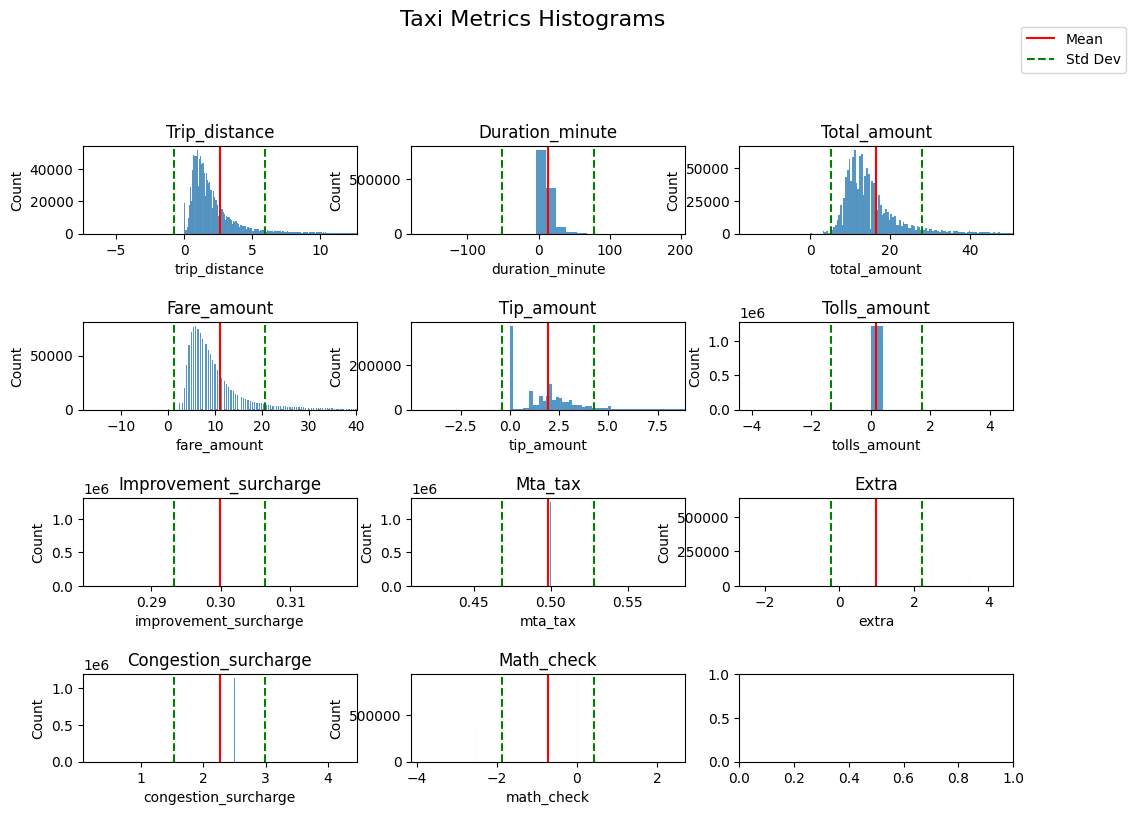

In [7]:
fig, axs = plt.subplots(4, 3, figsize=(12, 8))

for i, column in enumerate(numeric_cols):
    taxi_var = taxi_df[column]
    mean = taxi_var.mean()
    std_dev = taxi_var.std()
    
    row = i // 3
    col = i % 3
    
    sns.histplot(taxi_var, bins=2000, ax=axs[row, col])
    axs[row, col].set_title(column.capitalize())
    
    # Set x-axis limits based on min and max values in the column
    axs[row, col].set_xlim(mean - 3*std_dev, mean + 3*std_dev)
    
    axs[row, col].axvline(taxi_var.mean(), color='red', label='Mean')
    axs[row, col].axvline(taxi_var.mean() - taxi_var.std(), color='green', linestyle='--', label='Std Dev')
    axs[row, col].axvline(taxi_var.mean() + taxi_var.std(), color='green', linestyle='--')

# Add a single legend for all four plots
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1, 1), loc='right', ncol=1)

# Add a title for the whole figure
fig.suptitle('Taxi Metrics Histograms', fontsize=16, y=1.05)

# Add some padding between the subplots
plt.subplots_adjust(hspace=1)

# display the plot
plt.show()

### Single Histograms

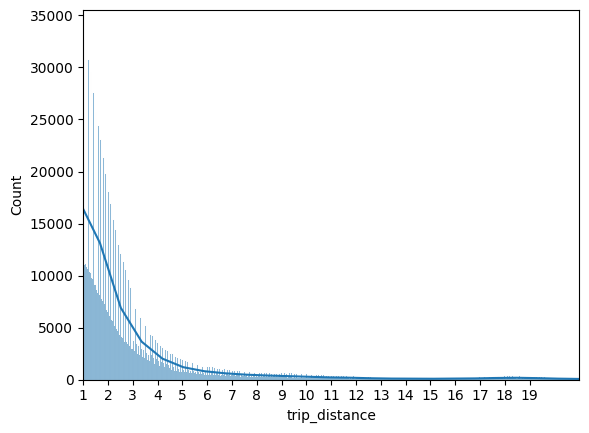

In [8]:
fig, ax = plt.subplots()
sns.histplot(taxi_df['trip_distance'], bins='auto', kde=True, ax=ax)  
ax.set_xlim(1,21)
ax.set_xticks(range(1,20))
plt.show()

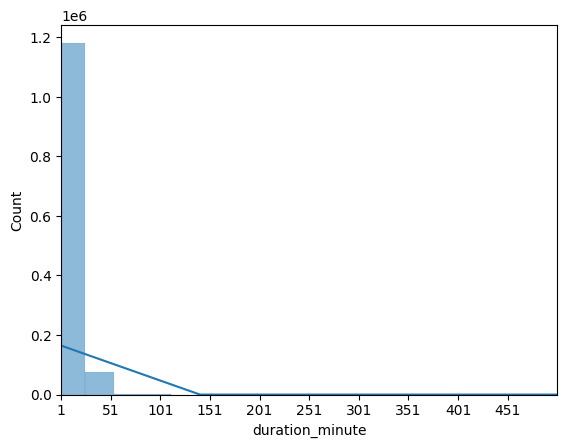

In [9]:
fig, ax = plt.subplots()
sns.histplot(taxi_df['duration_minute'], bins=1000, kde=True, ax=ax)  
ax.set_xlim(1,501)
ax.set_xticks(range(1,500,50))
plt.show()

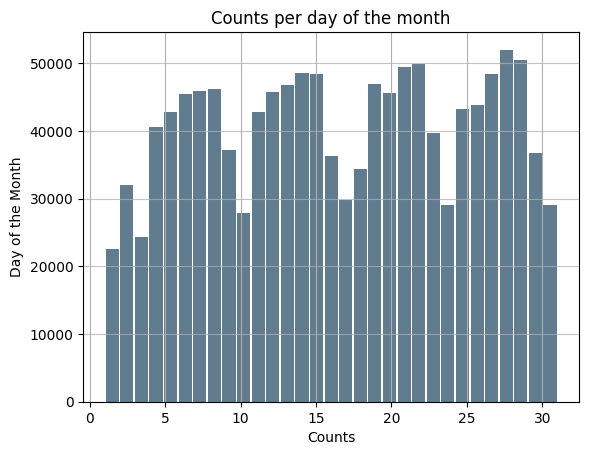

In [10]:
taxi_df['drop_off_day'].plot.hist(grid=True, bins=31, rwidth=0.9,
                   color='#607c8e')
plt.title('Counts per day of the month')
plt.xlabel('Counts')
plt.ylabel('Day of the Month')
plt.grid(axis='y', alpha=0.75)

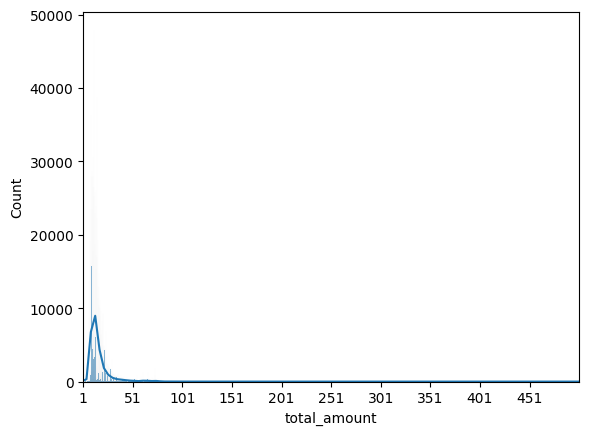

In [11]:
fig, ax = plt.subplots()
sns.histplot(taxi_df['total_amount'], bins=10000, kde=True, ax=ax)  
ax.set_xlim(1,501)
ax.set_xticks(range(1,500,50))
plt.show()

# CATEGORICAL DATA PLOTS  

<Axes: xlabel='drop_off_dow', ylabel='count'>

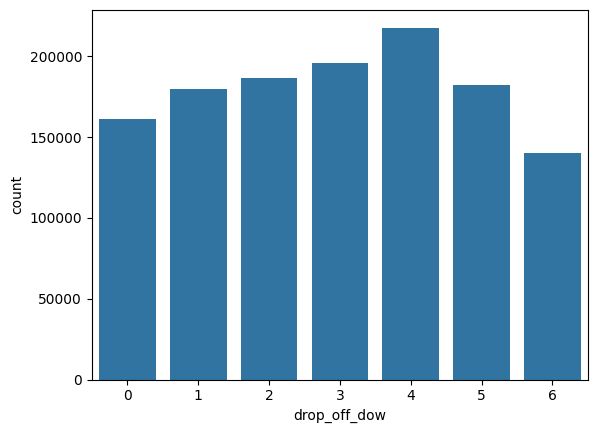

In [12]:
sns.countplot(x='drop_off_dow',data=taxi_df)

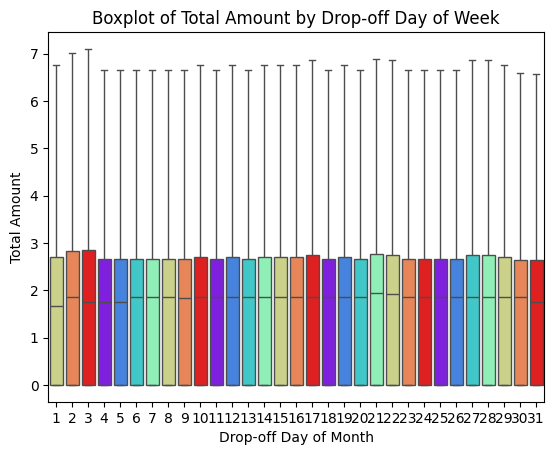

In [13]:
sns.boxplot(x='drop_off_day', y='tip_amount', data=taxi_df, hue='drop_off_dow', palette='rainbow', showfliers=False, legend=False)
plt.xlabel('Drop-off Day of Month')
plt.ylabel('Total Amount')
plt.title('Boxplot of Total Amount by Drop-off Day of Week')
plt.show()

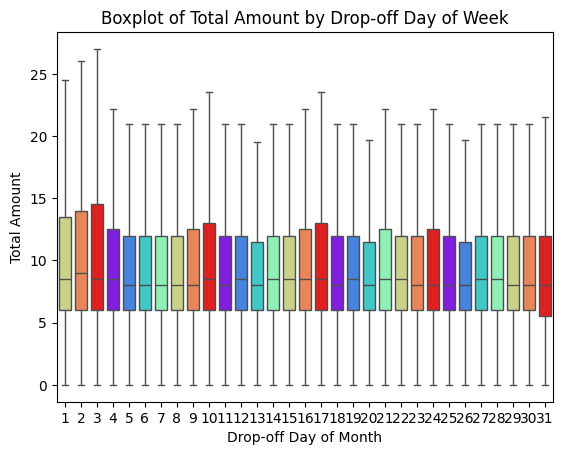

In [14]:
sns.boxplot(x='drop_off_day', y='fare_amount', data=taxi_df, hue='drop_off_dow', palette='rainbow', showfliers=False, legend=False)
plt.xlabel('Drop-off Day of Month')
plt.ylabel('Total Amount')
plt.title('Boxplot of Total Amount by Drop-off Day of Week')
plt.show()

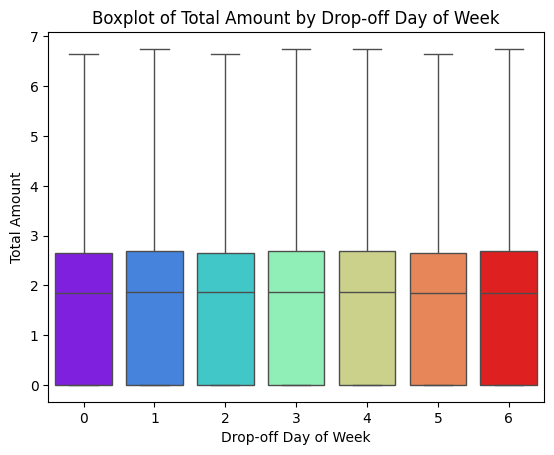

In [15]:
sns.boxplot(x='drop_off_dow', y='tip_amount', data=taxi_df, hue='drop_off_dow', palette='rainbow', showfliers=False, legend=False)
plt.xlabel('Drop-off Day of Week')
plt.ylabel('Total Amount')
plt.title('Boxplot of Total Amount by Drop-off Day of Week')
plt.show()

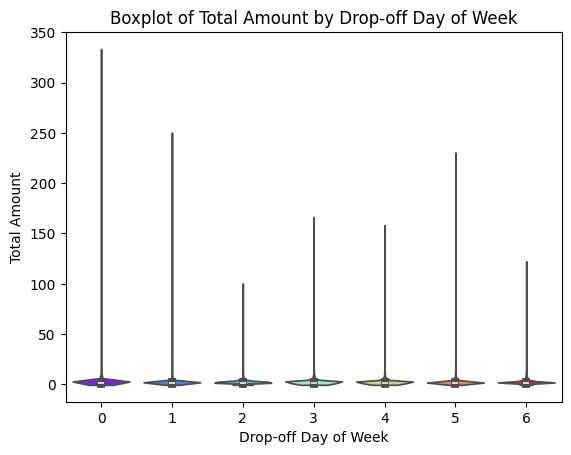

In [16]:
sns.violinplot(x='drop_off_dow', y='tip_amount', data=taxi_df, hue='drop_off_dow', palette='rainbow', legend=False)
plt.xlabel('Drop-off Day of Week')
plt.ylabel('Total Amount')
plt.title('Boxplot of Total Amount by Drop-off Day of Week')
plt.show()

/tmp/ipykernel_16696/2506109147.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_amount', y='drop_off_dow', data=avg_total_amount_by_dow, palette='rainbow', orient='h')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


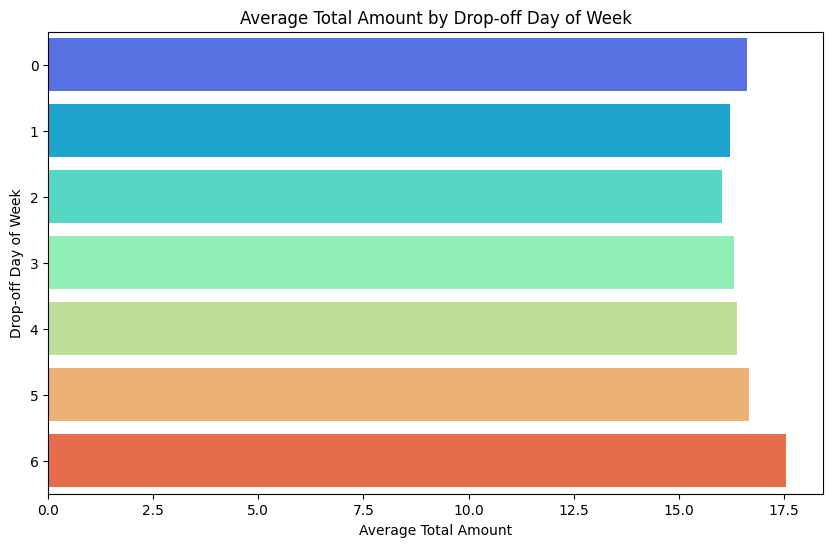

In [18]:
# Calculate the average total_amount by drop_off_dow
avg_total_amount_by_dow = taxi_df.groupby('drop_off_dow')['total_amount'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='total_amount', y='drop_off_dow', data=avg_total_amount_by_dow, palette='rainbow', orient='h')
plt.xlabel('Average Total Amount')
plt.ylabel('Drop-off Day of Week')
plt.title('Average Total Amount by Drop-off Day of Week')
plt.legend().set_visible(False)  # Remove the legend
plt.show()

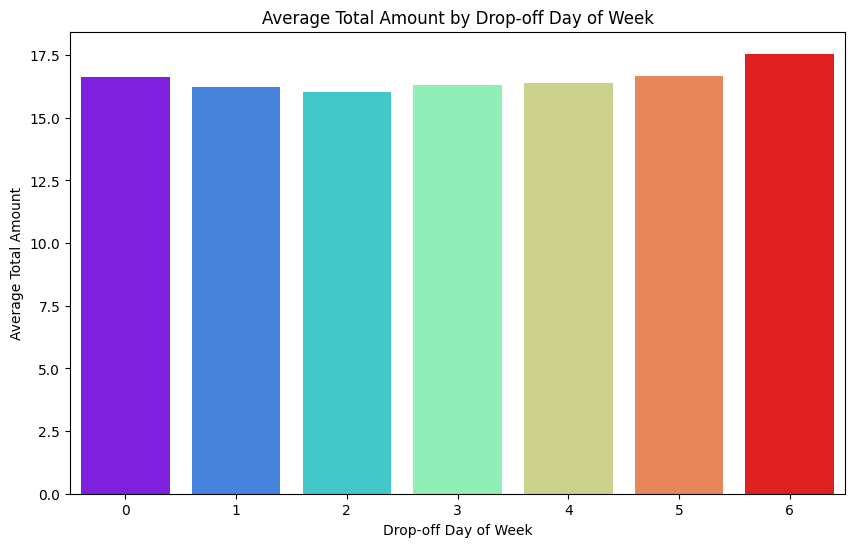

In [19]:
# Calculate the average total_amount by drop_off_dow
avg_total_amount_by_dow = taxi_df.groupby('drop_off_dow')['total_amount'].mean().reset_index()

# Create a bar plot with bars on the horizontal axis
plt.figure(figsize=(10, 6))
sns.barplot(x='drop_off_dow', y='total_amount', data=avg_total_amount_by_dow, hue='drop_off_dow', palette='rainbow')
plt.ylabel('Average Total Amount')
plt.xlabel('Drop-off Day of Week')
plt.title('Average Total Amount by Drop-off Day of Week')
plt.legend().set_visible(False)  # Remove the legend
plt.show()


# BIVARIATE ANALYSIS

### CORRELATION PLOTS

In [ ]:
plt.matshow(taxi_df_clean.corr())
plt.show()

In [ ]:
corr = taxi_df_clean.corr()
#corr_formatted = corr.map(lambda x: f'{x:.2f}')
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
#Pair plots are nice but not for such a large dataset
#sns.pairplot(taxi_df_clean)

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = taxi_df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)